<a href="https://colab.research.google.com/github/BerkSpar/sir-model/blob/master/sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

In [0]:
N     = 1000    #População
S0    = N * 0.9 #Sucetiveis Inicial
I0    = N * 0.1 #Infectados Inicial
R0    = 0       #Recuperados Inicial
u     = 0.005   #Taxa de mortalidade/natalidade
beta  = 0.8     #Taxa de Infecção
gamma = 0.067   #Taxa de Recuperação

In [0]:
def SIR_model(initialCondition, timeSteps, beta, gamma):
    S, I, R = initialCondition
    
    dS_dt = u*N - u*S - (beta*I*S)/N
    dI_dt = (beta*I*S)/N - gamma*I - u * I
    dR_dt = gamma*I - u * R
    
    return([dS_dt, dI_dt, dR_dt])

In [0]:
timeSteps = np.linspace (0, 100, 10000)

solution = scipy.integrate.odeint(SIR_model, [S0, I0, R0], timeSteps, args = (beta, gamma))
solution = np.array(solution)

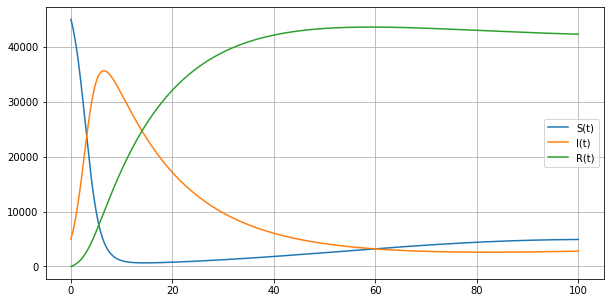

In [44]:
plt.figure(figsize=[10, 5])
plt.plot(timeSteps, solution[:, 0], label = "S(t)")
plt.plot(timeSteps, solution[:, 1], label = "I(t)")
plt.plot(timeSteps, solution[:, 2], label = "R(t)")
plt.legend()
plt.grid()
plt.show()